HSE, Applied Time Series Forecasitng , Winter 2022-23 

<font color="blue"> Lesson #10: DL and other approaches in Time Series Forecasting</font>

<span style="color:black; font-size: 12pt"></span>

Alexey Romanenko,
<font color="blue">alexromsput@gmail.com</font>

**Key words:** 
    - Deep Learning for Time Series Forecasting

**Your feedback:**  please provide you feedback  <a href="https://forms.gle/bEV5iwmTqdM9rUoy8"> here </a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime 

# don't forget to upload utils file to the colab session
import warnings

warnings.filterwarnings('ignore')

# setting of the plotting style, registers pandas date converters for matplotlib and the default figure size
import seaborn as sns
sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(25, 5))
sns.mpl.rc("font", size=14)

# DL in time series forecasting
**Questions**
* Does DL bring something new as time series forecasting approach?
* What are advantages of DL approach


## LSTM vs ARIMA

<img src = 'https://www.codeproject.com/KB/cross-platform/5165357/lstm-cell.png'>

ARMA model:
$$ y_t = \sum_{i=1}^\color{red}p \alpha_i\cdot y_{t-i}+\sum_{j=1}^\color{red}q \beta_j\cdot \varepsilon_{t-j}+\varepsilon_t$$
<img src = 'https://github.com/aromanenko/ATSF/blob/main/pic/Memory%20term%20in%20TSF.PNG?raw=true' width = 500pt>

**Question:**
* What are key difference between LSTM and ARIMA?
  - LSTM has non-linear components, 
  - LSTM has more sophisticated mixture of components

## Advantages of DL
**Questions**
* When non-linear transformation can be beneficial (can boost accuracy)?

<img src = 'https://github.com/aromanenko/ATSF/blob/main/pic/DL_Advantages.PNG?raw=true' width = 500pt>

<a href = "https://cs229.stanford.edu/proj2012/BussetiOsbandWong-DeepLearningForTimeSeriesModeling.pdf"> 

Article with analysis of DL for Energy Forecasting</a>

## Example of Usage
https://github.com/aromanenko/DLDF/blob/master/models/Partial_predictions.ipynb

https://github.com/aromanenko/DLDF/blob/master/features/FeaturesExploration.ipynb

# Intermittent Demand Forecasting Models
Times Series with intermittent-demand-pattern contains non-zero actual values in random time points (non-zero actual values occur occasionaly).


<img src = "https://github.com/aromanenko/ATSF/blob/main/pic/IntermittentExample.PNG?raw=true">
<img src = "https://github.com/aromanenko/ATSF/blob/main/pic/IntermittentExample2.PNG?raw=true">

## Intermittent Demand Time Series model

$$ y_t = x_t\cdot z_t +\varepsilon_t$$

   - $x_t$ - random variable (1 or 0) to have non-zero actual value       
   - $z_t$ - actual volume


**Note:**
 - sometimes intermittent time series are classified to more classes https://frepple.com/blog/demand-classification/
 - don't confuse intermittent and highly-causal driven time series:
     -- we don't know time

## Croston Model
<img src = "https://github.com/aromanenko/ATSF/blob/main/pic/CrostonIdea.PNG?raw=true">

**Croston Algorithm for Time Series Forecasting**

$$ \hat{y}_{t+1}=\hat z_t/\hat{n}_t$$
where
$$ \hat z_t = \begin{cases}z_{t-1}, & y_t==0 \\ \alpha\cdot{y_t}+(1-\alpha) z_{t-1}, & y_t <>0 \end{cases}$$

$$ \hat{n}_t = \begin{cases}\hat{n}_t, & y_t==0 \\ \beta\cdot{\color{red}{n_t}}+(1-\beta) \hat{n}_{t-1}, & y_t <>0 \end{cases}$$

$\alpha$ - smoothing parameter for time level value
$\beta$ - smoothing parameter for 0-intervals length forecasting

<img src = "https://github.com/aromanenko/ATSF/blob/main/pic/CrostonIdea2.PNG?raw=true">


**Example of Realization**
- https://towardsdatascience.com/croston-forecast-model-for-intermittent-demand-360287a17f5f

In [2]:
!pip install croston

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


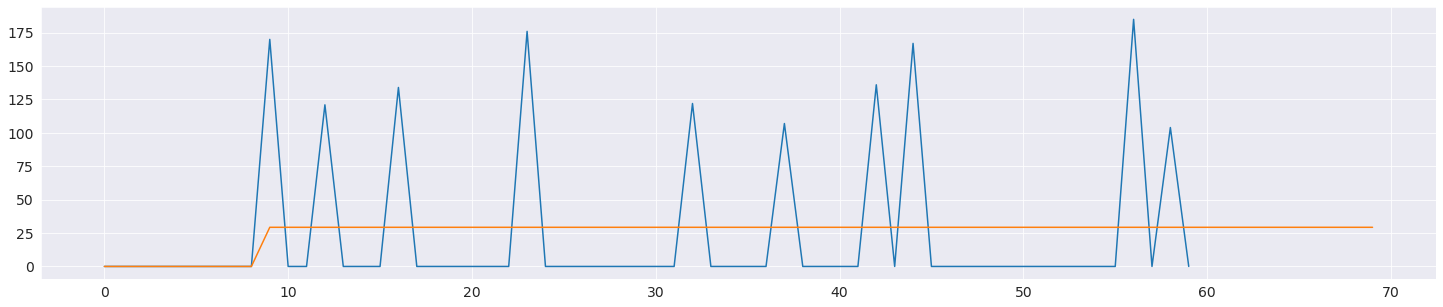

In [7]:
from croston import croston
import random

a = np.zeros(50)
val = np.array(random.sample(range(100,200), 10))
idxs = random.sample(range(50), 10)

ts = np.insert(a, idxs, val)

fit_pred = croston.fit_croston(ts, 10,'original')

yhat = np.concatenate([fit_pred['croston_fittedvalues'], fit_pred['croston_forecast']])

plt.plot(ts)
plt.plot(yhat)

# Other Regression models

Most of them are present in pyflux package
https://pyflux.readthedocs.io/en/latest/index.html

# Conclusion

* DL can be useful in case of very sophisticated TS
* Croston Model should be used to analyse time series with intermittend-demand-pattern
  * Note: time series with zero actual values can be not-intermittent

* Complicated Time series models should bu used rarely in real time series forecasting tasks.  

## Materials
* List of TS forecasting packages in Python https://github.com/aromanenko/ATSF/wiki/List-of-packages-for-Time-Series-Forecasting-in-Python
* List of TS forecasitng packages in R https://github.com/aromanenko/ATSF/wiki/List-of-Packages-for-Time-Series-Forecatging-in-R


# Self-check questions
1. What is an advantage of DL models wrt classic ML models?
2. What is intermittent-demand-patterned time series?
3. Describe how croston model works
4. What is the difference between EGARСH model and ARIMA Model?